[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/scipy_sample.ipynb)

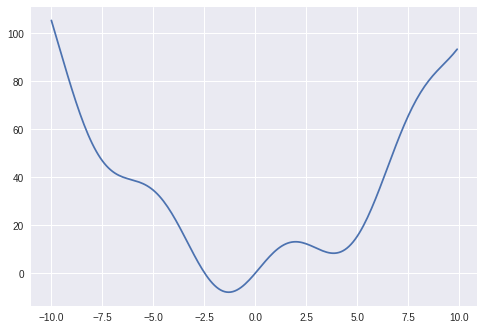

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import optimize
def f(x):
  return x**2+10*np.sin(x)
x=np.arange(-10,10,0.1)
plt.plot(x,f(x))
plt.show()

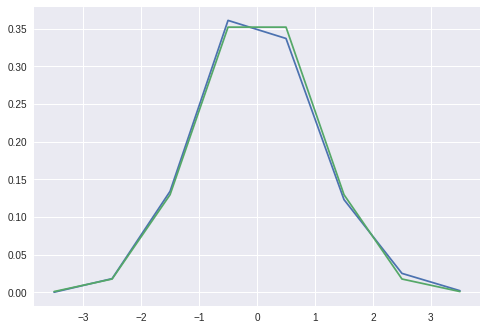

In [14]:
import random
a=np.random.normal(size=1000)
bins=np.arange(-4,5)
histogram=np.histogram(a,bins=bins,normed=True)[0]
bins=0.5*(bins[1:]+bins[:-1])
from scipy import stats
b=stats.norm.pdf(bins)
plt.plot(bins,histogram)
plt.plot(bins,b)
plt.show()

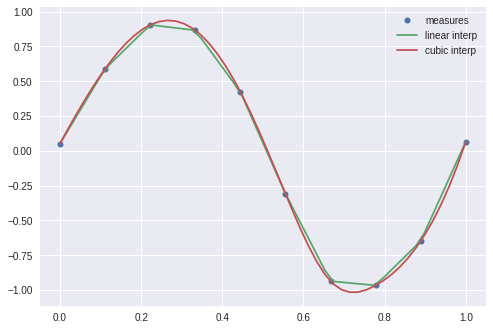

In [16]:
import numpy as np
from scipy.interpolate import interp1d
import pylab as pl

measured_time=np.linspace(0,1,10)
noise=(np.random.random(10)*2-1)*1e-1
measures=np.sin(2*np.pi*measured_time)+noise
linear_interp=interp1d(measured_time,measures)
computed_time=np.linspace(0,1,50)
linear_results=linear_interp(computed_time)
cubic_interp=interp1d(measured_time,measures,kind='cubic')
cubic_results=cubic_interp(computed_time)
pl.plot(measured_time,measures,'o',ms=6,label='measures')
pl.plot(computed_time,linear_results,label='linear interp')
pl.plot(computed_time, cubic_results,label='cubic interp')
pl.legend()

In [20]:
from scipy.integrate import quad
res,err=quad(np.sin,0,np.pi/2)
def calc_derivative(ypos,time,counter_arr):
  counter_arr+=1
  return -2*ypos
counter=np.zeros((1,),dtype=np.uint16)
from scipy.integrate import odeint
time_vec=np.linspace(0,4,40)
yvec,info=odeint(calc_derivative,1,time_vec,args=(counter,),full_output=True)
counter

array([129], dtype=uint16)

In [21]:
info['nfe'][:10]

array([31, 35, 43, 49, 53, 57, 59, 63, 65, 69], dtype=int32)

Text(0,0.5,'y position [m]')

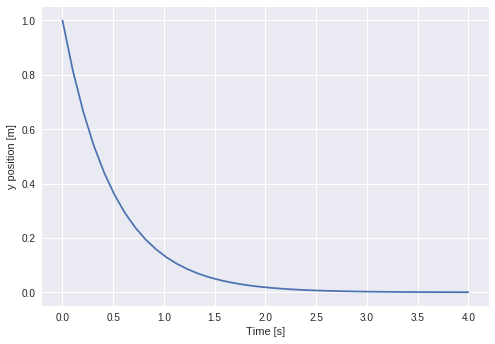

In [23]:
import numpy as np
from scipy.integrate import odeint
import pylab as pl

def calc_derivative(ypos,time):
  return -2*ypos
time_vec=np.linspace(0,4,40)
yvec=odeint(calc_derivative,1,time_vec)
pl.plot(time_vec,yvec)
pl.xlabel('Time [s]')
pl.ylabel('y position [m]')

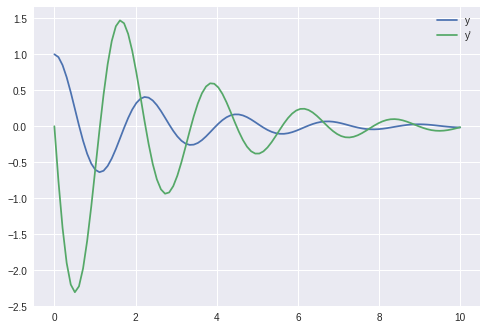

In [24]:
import numpy as np
from scipy.integrate import odeint
import pylab as pl
mass=0.5
kspring=4
cviscious=0.4
nu_coef=cviscious/mass
om_coef=kspring/mass
def calc_deri(yvec,time,nuc,omc):
  return (yvec[1], -nuc*yvec[1]-omc*yvec[0])
time_vec=np.linspace(0,10,100)
yarr=odeint(calc_deri,(1,0),time_vec,args=(nu_coef,om_coef))
pl.plot(time_vec,yarr[:,0],label='y')
pl.plot(time_vec,yarr[:,1],label="y'")
pl.legend()

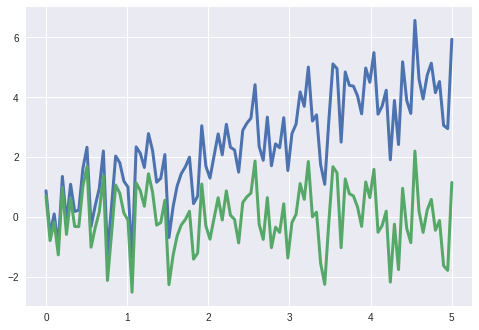

In [25]:
from matplotlib import pyplot as plt
from scipy import signal
t=np.linspace(0,5,100)
x=t+np.random.normal(size=100)
plt.plot(t,x,linewidth=3)
plt.plot(t,signal.detrend(x),linewidth=3)